In [15]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [9]:
def downscale_image(input_image_path, output_image_path, new_width, new_height):
    with Image.open(input_image_path) as img:
        # Resize the image
        img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)
        
        # Save the resized image
        img_resized.show()
#         print(f"Image saved to {output_image_path}")

In [11]:
# Example usage
input_image_path = '/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Frames/frame_0.jpg'  # Replace with your image path
output_image_path = 'resized_image.jpg'      # Replace with your desired output image path
new_width = 50   # Replace with desired width
new_height = 50  # Replace with desired height

downscale_image(input_image_path, output_image_path, new_width, new_height)

/var/folders/cv/6pxft_bx4g11l2vyl3c5l_n00000gn/T/ipykernel_12619/2236038393.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)


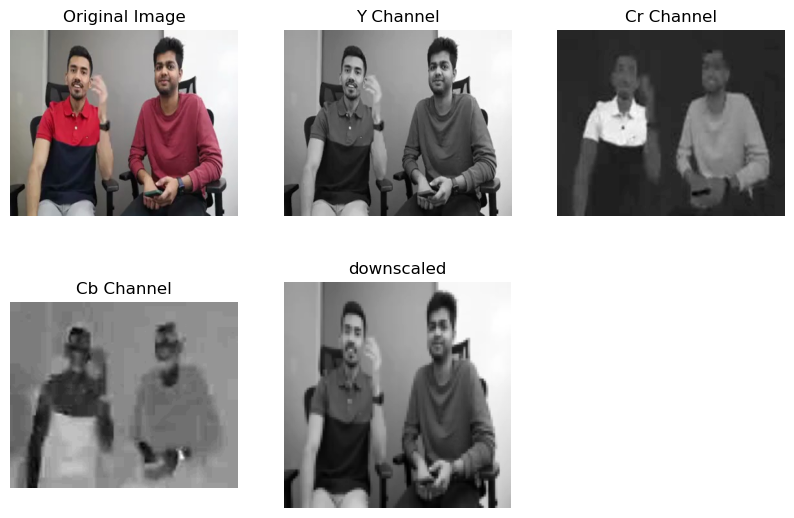

In [21]:
def display_ycrcb_channels(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Convert from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert from RGB to YCrCb
    img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)

    # Split into the Y, Cr, and Cb channels
    Y, Cr, Cb = cv2.split(img_ycrcb)
    
    img_resized = cv2.resize(Y, (100, 100), interpolation=cv2.INTER_AREA)

    # Display the channels
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 3, 2)
    plt.imshow(Y, cmap='gray')
    plt.title('Y Channel')
    plt.axis('off')

    plt.subplot(3, 3, 3)
    plt.imshow(Cr, cmap='gray')
    plt.title('Cr Channel')
    plt.axis('off')

    plt.subplot(3, 3, 4)
    plt.imshow(Cb, cmap='gray')
    plt.title('Cb Channel')
    plt.axis('off')
    
    
    plt.subplot(3, 3, 5)
    plt.imshow(img_resized, cmap='gray')
    plt.title('downscaled')
    plt.axis('off')

    


    plt.show()

# Example usage
image_path = '/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Frames/frame_0.jpg'  # Replace with your image path
display_ycrcb_channels(image_path)

In [22]:
fileName="/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Videos/video1.mp4"


In [25]:
fileName.split("/")[-1].split(".")[0]

'video1'

In [26]:
import os

In [27]:
os.listdir("/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Videos")

['video12.mp4',
 'video13.mp4',
 'video11.mp4',
 'video10.mp4',
 'video14.mp4',
 'video15.mp4',
 'video17.mp4',
 'video16.mp4',
 'video6.mp4',
 'video7.mp4',
 'video5.mp4',
 'video4.mp4',
 'video1.mp4',
 'video3.mp4',
 'video2.mp4',
 'video9.mp4',
 'video8.mp4',
 'video18.mp4',
 'video19.mp4',
 'video20.mp4']

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def load_and_predict(image_path):
    # Load the saved model
    model = load_model('/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Data/SavedModel/signatureDetect.h5')

    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    img = np.reshape(img, (1, 100, 100, 1))
    img = img / 255.0
    # Make a prediction
    prediction = model.predict(img)
    model.train_g

    predicted_class = np.argmax(prediction, axis=1)

    return predicted_class

In [32]:
print(load_and_predict(
        "/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Data/Train/video10/frame_10_video10.jpg"))

1/1 [==============================] - 0s 61ms/step
[1]


In [ ]:
import cv2
import numpy as np
from multiprocessing import Pool

# Function to calculate the difference between two frames
def calculate_frame_diff(args):
    frame1, frame2 = args
    diff = cv2.absdiff(frame1, frame2)
    score = np.sum(diff)
    return score

def read_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
    cap.release()
    return frames

def calculate_motion(video_path):
    frames = read_frames(video_path)

    # Pair frames for processing
    frame_pairs = [(frames[i], frames[i+1]) for i in range(len(frames)-1)]

    # Use multiprocessing to calculate frame differences
    with Pool() as pool:
        motion_scores = pool.map(calculate_frame_diff, frame_pairs)

    return motion_scores

def main():
    video_path = '/Users/sms/USC/MS-SEM2/multimedia/video-shazam/dataset/Queries/video1_1.mp4'
    motion_scores = calculate_motion(video_path)
    print(motion_scores)


main()

In [34]:
diffs=[74886, 86280, 18898, 106037, 124259, 131434, 139987, 100762, 20468, 80764, 94329, 96053, 103994, 89123, 18320, 77467, 96395, 82195, 100644, 126086, 17715, 192287, 226016, 217697, 208237, 153010, 16136, 173603, 149823, 171250, 197057, 189631, 13446, 186562, 185789, 146951, 181497, 196654, 15495, 178712, 161248, 153657, 167085, 153996, 15450, 139328, 190656, 160945, 137266, 247923, 10318, 141721, 166696, 165104, 171624, 164431, 16668, 187764, 187851, 177936, 173361, 144106, 14181, 137367, 126630, 124417, 126652, 95774, 12336, 85256, 82201, 92538, 97700, 86292, 17154, 84293, 106746, 114956, 151461, 147583, 16717, 117766, 102438, 94060, 109529, 95075, 16169, 84038, 106909, 140238, 175617, 132328, 14455, 106884, 119795, 123106, 111258, 107379, 6277, 117945, 121271, 113583, 133445, 136807, 10233, 165945, 176465, 189790, 175148, 126136, 17438, 112732, 129057, 156732, 188742, 160755, 17443, 131122, 171219, 181358, 192081, 172106, 13801, 170029, 192555, 178954, 174653, 142908, 22769, 180122, 131427, 117972, 105009, 63256, 19403, 61129, 68746, 71325, 89206, 107387, 26332, 152335, 184445, 176754, 191729, 142993, 18214, 135867, 137123, 128286, 146913, 123880, 23341, 113494, 108513, 95981, 119428, 72713, 16715, 48582, 108791, 118201, 113840, 133743, 16231, 142183, 134321, 91628, 103430, 110942, 15608, 87472, 101256, 69440, 108025, 109589, 17270, 104725, 112641, 99071, 135862, 155332, 9509, 170962, 187366, 201230, 226538, 183618, 11665, 178443, 169600, 171911, 163867, 152016, 12983, 177555, 194698, 176992, 144769, 141240, 14500, 90525, 67133, 68526, 118857, 93643, 13197, 107448, 105231, 102379, 97431, 75299, 16508, 85429, 74879, 66245, 86579, 78895, 18634, 78078, 81250, 81585, 102959, 73940, 16203, 69680, 72742, 63967, 72330, 64308, 22262, 67010, 102682, 133858, 144289, 167798, 18690, 158250, 163369, 133140, 110001, 110804, 15473, 109999, 122484, 137357, 155322, 166375, 354, 332698, 255057, 246129, 218679, 194851, 11397, 163592, 163873, 192889, 219517, 173885, 13867, 162722, 214500, 298685, 385525, 352513, 17122, 275380, 220359, 181350, 155646, 139678, 12347, 152970, 124670, 151293, 163799, 151291, 19679, 159536, 202094, 202052, 231045, 268787, 16011, 341179, 361294, 234992, 154669, 123597, 13147, 102700, 62298, 48144, 94393, 104127, 3694, 139274, 163793, 260594, 120632, 147605, 22306, 171316, 205018, 206018, 235620, 216711, 19000, 226220, 188945, 151028, 210438, 232794, 15705, 248187, 224881, 156359, 113525, 98716, 13217, 158537, 138558, 121214, 107893, 95320, 15708, 139980, 101599, 59313, 96313, 109650, 13542, 112950, 88420, 64932, 83244, 77436, 14721, 80634, 84175, 78987, 95136, 138777, 15336, 135913, 135769, 120565, 139785, 137113, 15092, 144283, 142785, 117644, 100454, 85530, 11880, 107233, 79398, 42833, 54881, 55333, 19796, 63509, 36200, 65444, 93002, 110058, 14650, 139674, 160373, 159788, 176283, 173063, 12332, 117934, 116807, 144737, 159061, 143627, 13713, 164039, 143854, 124761, 97458, 98853, 8958, 85518, 60191, 107425, 118849, 119174, 8485, 113729, 77456, 70863, 85742, 104500, 6391, 127299, 138446, 139169, 157056, 158864, 19718, 148658, 137528, 135429, 163073, 175205, 15706, 193721, 162701, 165032, 181910, 188930, 13762, 175747, 210689, 196177, 195780, 176112, 13579, 177836, 137067, 121479, 134925, 139636, 18734, 157478, 135273, 107983, 118642, 146404, 10992, 166931, 151943, 127537, 135430, 122019, 12437, 135572, 139030, 115850, 128695, 118906, 13444, 129374, 136027, 113456, 120805, 91044, 18347, 84781, 59391, 60818, 63672, 85454, 13424, 142513, 205257, 221867, 206853, 202252, 11998, 211842, 169817, 104555, 143183, 132439, 20056, 134088, 115288, 88978, 93264, 89629, 15778, 79774, 69883, 62814, 79271, 76543, 17028, 77643, 78660, 79898, 94244, 332849, 9453, 81629, 56816, 66667, 83717, 93035, 5144, 113104, 139533, 179915, 170404, 250819, 8393, 117618, 81223, 85631, 74136, 95971, 10026, 89240, 58976, 37223, 23358, 28596, 11496, 30421, 40999, 36671, 54938, 87411, 5945, 97113, 99164, 101633, 101720, 94957, 12968, 92634, 86620, 87303, 110782, 102651, 20802, 129578, 170603, 246482, 310061, 337319, 12521, 284301, 216461, 224226, 247297, 228726, 5569, 240295, 216398, 247991, 290612, 231668, 14562, 285114, 152215, 195721, 239154, 260364, 17765, 223305, 162258, 88279, 143796, 164017, 6935, 191727, 182916, 187775, 179094, 184535, 9583, 190293, 175799, 179090, 174027, 166102, 9556, 183080, 149982, 118377, 97335, 105592, 10191, 142554, 143234, 190421, 203737, 138401, 10197, 137801, 145310, 115901, 143630, 167362, 13027, 177658, 175499, 159204, 155833, 136831, 11722, 144269, 182625, 208998, 224793, 147981, 17549, 138825, 141628, 106796, 93420, 69179, 16054, 79010, 88868, 92466, 117661, 103677, 19468, 78600, 74622, 73697, 114864, 120189, 23241, 145056, 138074, 141795, 170301, 165976, 9630, 148985, 122898, 90385, 101167, 96777, 15990, 126269, 143954, 163045, 226849, 535047, 11868, 291633, 214600, 135452, 137239, 151541, 15754, 164015, 165211, 147688, 133294, 164588, 15545, 173954, 152199, 122775, 90205, 109803, 16722, 145767, 127535, 82279, 130031, 135394, 13888, 115316, 81828, 72654, 110952, 99461, 14970, 72998, 101412, 110091, 112525, 116851, 8029, 144734, 141626, 175875, 173306, 124320, 8651, 118933, 61468, 82203, 114730, 134508, 8960, 170521, 168610, 172116, 171787, 148400, 20492, 133201, 131635, 132028, 128905, 88100, 12279, 74214, 58689, 53113, 93889, 93796, 14067, 107126, 94159, 88845, 100946, 77529, 17823, 95302, 102405, 105288, 97301, 89883, 19293, 86118, 70867, 77417, 101547, 86777, 15112, 59920, 61909, 75692, 114286, 155302, 6447, 181509, 191718, 184334, 176682, 228876, 11047, 154092, 159483, 218382, 226854, 214423, 14215, 199348, 146114, 109173, 101479, 118681, 2984, 150087, 145665, 275700, 174970, 160858, 12635, 163871, 169830, 164713, 173960, 161072, 15736, 150103, 140922, 115162, 109033, 97982, 12208, 78144, 103653, 110346, 146482, 179431, 17270, 184297, 208307, 195341, 208648, 222257, 20150, 219693, 190230, 183308, 176996, 130391, 17792, 144479, 139036, 137876, 124395, 97420, 20864, 84175, 69369, 61840, 55338, 62323, 16434, 68217, 77514, 87353, 95252, 219356, 7012, 99973, 139571, 152735, 174379, 141088, 12191, 120548, 102876, 93505, 87108, 66672, 15703, 55267, 53263, 58914, 99216, 148288, 11614, 181308, 210039, 163447, 173994, 162680, 17717, 148956, 141762, 127089, 114424, 116852, 17433, 110221, 145149, 171564, 126093, 128385, 13324, 153716, 123764, 85347, 63474, 66310, 16817, 86862, 82214, 89286, 88411, 81029, 14018, 80934, 104896, 104549, 80932, 69665, 14070, 97749, 164592, 187756, 166879, 138651, 12924, 148603, 169696, 176986, 177089, 157854, 17217, 125322, 120333, 142992, 192546, 211902, 15817, 187679, 130075, 110613, 98069, 114833, 13057, 88544, 74767, 91651, 112956, 85032, 22163, 71406, 53089, 71819, 117319, 109496, 16535, 77478, 113189, 146756, 196064, 170334, 9980, 137239, 120341]


In [36]:
len(set(diffs))

896

In [37]:
len(diffs)

899

In [38]:
899/60

14.983333333333333

In [39]:
1002/60

16.7

In [40]:
1002%60

42

In [42]:
954%60

54